# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The task involves transforming the business objective of identifying key drivers for used car prices into a data problem definition.
## Objectives
1. Create a predictive model using statistical and machine learning techniques to anaylyse the dataset of used car features and determine which factors most significantly influence the pricing the used car.
2. Uncover correlation and dependencies within the data that can accurately predict the price of the used cars based on their attributes
3. Provide actionable insights and recommendations based on model findings

## Data
The dataset is downloaded from Kaggle, and it contains 426k used car data with 18 features

1. **id:** ID is a numerical index value
2. **region:** Region or City of the car
3. **price:** Price of the Car (range between 0 to 3,736,928,711)
4. **year:** Year of Car manufactured (from 1900 to 2022)
5. **manufacturer:** Name of manufacturer of the Car
6. **model:** Model of the Car
7. **condition:** Condition of the Car(good,excellent,fair,like new,new,salvage)
8. **cylinders:** Number of cylinders in the Car (3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,10 cylinders,12 cylinders,other)
9. **fuel:** Type of fuel uses for the Car (gas,diesel,hybrid,electric,other)
10. **odometer:** Odometer reading on the Car (range between 0 and 10,000,000)
11. **title_status:** Title Status of the Car ((clean,rebuilt,lien,salvage,missing,parts only))
12. **transmission:** Trnasmission type of the Car (automatic,manual,other)
13. **VIN:** Vehicle Identification Number (VIN) on the Car
14. **drive:** Drive or Transmission type of the Car (rwd,4wd,fwd)
15. **size:** Size of the Car (full-size,mid-size,compact,sub-compact)
16. **type:** Type of the Car (pickup,truck,coupe,SUV,hatchback,mini-van,sedan,offroad,bus,van,convertible,wagon,other)
17. **paint_color:** Color of the Car (white,blue,red,black,silver,grey,brown,yellow,orange,green,custom,purple)
18. **state:** State in which the Car is located



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example regression model

In [3]:
# mount google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
# Load the dataset
file_path = "/content/drive/MyDrive/UCB-PCMLAI/data/vehicles.csv"
vehicles = pd.read_csv(file_path)
print(vehicles.head())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

### Exploratory Data Analysis

In [5]:
# Display basic information of the dataset
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
# Display descriptive statistical values
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
# Check for missing values
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [8]:
# Returns percentage of rows containing missing data
def check_null(df):

    return df.isna().sum() * 100/len(df)


check_null(vehicles)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [9]:
# check minimum and maximum on price
print(vehicles['price'].min())
print(vehicles['price'].max())

0
3736928711


Some of the features missing considerably high percentage of data, and those feature will be dropped/excluded from the analysis to keep the dataset clean.

**Features with high percentage of missing values:**
condition (40.78%), cylinders (41.62%), VIN (37.72%), drive (30.58%), size (71.76%), type (21.75%) and paint_color(30.50%))


# Visualize the distribution of the "price" variable


In [10]:
# Visualize the distribution of the "price" variable # running quite longer than usual and failed with timeout error

# plt.figure(figsize=(10, 6))
# sns.histplot(vehicles['price'], kde=True)
# plt.title('Distribution of price Variable')
# plt.xlabel('Used Car Price')
# plt.ylabel('Frequency')
# plt.show()

In [11]:
# checking skewness
skewness_price = vehicles['price'].skew()
print("Skewness of Price:", skewness_price)

Skewness of Price: 254.40693228580142


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

**Data Cleansing & Feature Engineering**
1. Drop the features ID and VIN as they does not have any influence on decesive or dependant variables.
2. drop the features with high percentage of missing data
3. Values in the Price column is ranging from 0 to 3.7 Billion,which seems  inconsistent. Hence filtering the price and considering base line betweek 5k - 50k, and the below visualization justifying the decision of removing the outliers for price colum


In [12]:
# Drop ID & VIN columns

vehicles.drop(['id','condition','cylinders','VIN','drive','size','type','paint_color'], axis=1, inplace=True)


In [13]:
# filter the price to remove outliers
vehicles = vehicles[(vehicles['price'] >= 5000) & (vehicles['price'] <= 50000)]

In [14]:
# Calculate age of cars
current_year = 2024  # Assuming current year is 2024
vehicles['age'] = current_year - vehicles['year']

<ipython-input-14-5ff855d22fa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['age'] = current_year - vehicles['year']


In [15]:
# basic information after data cleansing
#vehicles.shape
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318632 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        318632 non-null  object 
 1   price         318632 non-null  int64  
 2   year          317797 non-null  float64
 3   manufacturer  307321 non-null  object 
 4   model         315745 non-null  object 
 5   fuel          316221 non-null  object 
 6   odometer      316830 non-null  float64
 7   title_status  313005 non-null  object 
 8   transmission  317046 non-null  object 
 9   state         318632 non-null  object 
 10  age           317797 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 29.2+ MB


In [16]:
# Check for missing values after cleansing
vehicles.isnull().sum()

region              0
price               0
year              835
manufacturer    11311
model            2887
fuel             2411
odometer         1802
title_status     5627
transmission     1586
state               0
age               835
dtype: int64

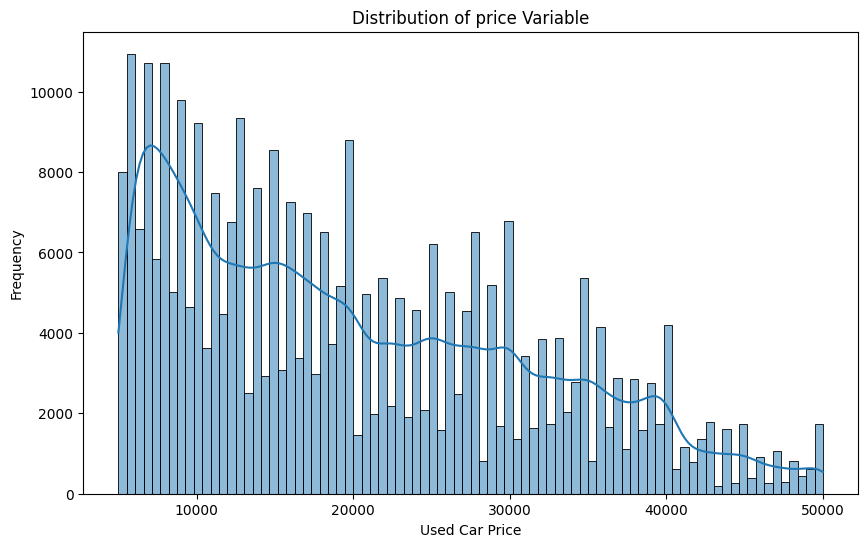

In [17]:
# Visualize the distribution of the "price" variable after filtering the dataframe
plt.figure(figsize=(10, 6))
sns.histplot(vehicles['price'], kde=True)
plt.title('Distribution of price Variable')
plt.xlabel('Used Car Price')
plt.ylabel('Frequency')
plt.show()

In [18]:
# check skewness after cleaning and filtering the dataframe
skewness_price = vehicles['price'].skew()
print("Skewness of Price:", skewness_price)

Skewness of Price: 0.6009859287527228


In [19]:
# Handle NaN values in categorical columns (impute with mode or consider as a separate category)
# Define columns to fill NaN values
columns_to_fill = ['region', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'state']

# Fill NaN values with 'Unknown' in specified columns
vehicles[columns_to_fill] = vehicles[columns_to_fill].fillna('Unknown')

# Display the updated DataFrame
print(vehicles)

                 region  price    year manufacturer                     model  \
0              prescott   6000     NaN      Unknown                   Unknown   
1          fayetteville  11900     NaN      Unknown                   Unknown   
2          florida keys  21000     NaN      Unknown                   Unknown   
7         hudson valley  15995     NaN      Unknown                   Unknown   
8       medford-ashland   5000     NaN      Unknown                   Unknown   
...                 ...    ...     ...          ...                       ...   
426875          wyoming  23590  2019.0       nissan         maxima s sedan 4d   
426876          wyoming  30590  2020.0        volvo  s60 t5 momentum sedan 4d   
426877          wyoming  34990  2020.0     cadillac          xt4 sport suv 4d   
426878          wyoming  28990  2018.0        lexus           es 350 sedan 4d   
426879          wyoming  30590  2019.0          bmw  4 series 430i gran coupe   

           fuel  odometer t

In [20]:
# Check for missing values after cleansing
vehicles.isnull().sum()

region             0
price              0
year             835
manufacturer       0
model              0
fuel               0
odometer        1802
title_status       0
transmission       0
state              0
age              835
dtype: int64

In [21]:
# Handle NaN values in 'year' and 'odometer' columns with mean
vehicles['year'].fillna(vehicles['year'].mean(), inplace=True)
vehicles['odometer'].fillna(vehicles['odometer'].mean(), inplace=True)

# Display the updated DataFrame
print(vehicles)

                 region  price         year manufacturer  \
0              prescott   6000  2011.922535      Unknown   
1          fayetteville  11900  2011.922535      Unknown   
2          florida keys  21000  2011.922535      Unknown   
7         hudson valley  15995  2011.922535      Unknown   
8       medford-ashland   5000  2011.922535      Unknown   
...                 ...    ...          ...          ...   
426875          wyoming  23590  2019.000000       nissan   
426876          wyoming  30590  2020.000000        volvo   
426877          wyoming  34990  2020.000000     cadillac   
426878          wyoming  28990  2018.000000        lexus   
426879          wyoming  30590  2019.000000          bmw   

                           model     fuel      odometer title_status  \
0                        Unknown  Unknown  89222.694805      Unknown   
1                        Unknown  Unknown  89222.694805      Unknown   
2                        Unknown  Unknown  89222.694805      Un

In [22]:
vehicles.isnull().sum()

region            0
price             0
year              0
manufacturer      0
model             0
fuel              0
odometer          0
title_status      0
transmission      0
state             0
age             835
dtype: int64

In [23]:
# Calculate age of cars (Re-run to fix the age missing values)
current_year = 2024  # Assuming current year is 2024
vehicles['age'] = current_year - vehicles['year']

In [24]:
vehicles.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
state           0
age             0
dtype: int64

In [25]:
# Convert categorical variables into numerical representations # system crashed multiple times with memory Issue
# import pandas as pd
# vehicles_encoded = pd.get_dummies(vehicles,
#                                   columns=['region', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'state'],
#                                   drop_first=True)

In [26]:
# Try OneHotEncoder to convert categorical features

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform categorical columns
encoded_data = encoder.fit_transform(vehicles[['region', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'state']])

# Convert to DataFrame (optional)
vehicles_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['region', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'state']))

# Print the encoded DataFrame
print(vehicles_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        region_SF bay area  region_abilene  region_akron / canton  \
0                      0.0             0.0                    0.0   
1                      0.0             0.0                    0.0   
2                      0.0             0.0                    0.0   
3                      0.0             0.0                    0.0   
4                      0.0             0.0                    0.0   
...                    ...             ...                    ...   
318627                 0.0             0.0                    0.0   
318628                 0.0             0.0                    0.0   
318629                 0.0             0.0                    0.0   
318630                 0.0             0.0                    0.0   
318631                 0.0             0.0                    0.0   

        region_albany  region_albuquerque  region_altoona-johnstown  \
0                 0.0                 0.0                       0.0   
1                 0.0        

OneHotEncoder transformed the categorical features into 23,325 columns, and the transformed dataset into 318,632 rows abd 23,325 columns.





In [27]:
vehicles_encoded.sample()

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
290177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
# Combine encoded data with original DataFrame # program crahed due to memeory issues, unable to process the transaction
# vehicles_combined = pd.concat([vehicles.drop(columns=['region', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'state']), vehicles_encoded], axis=1)


In [29]:
# due to system resource issues, trying to reduce the number of columns and process the data


# Due to system resource/memory cache issues, system crashed and unable to procees the data. Hence, trying to reduce the number of columns and execute the program

In [30]:
# exluded the high transformed festures such as region,manufacturer,model and state
vehicles_reduced = vehicles.drop(['region', 'manufacturer', 'model', 'state'], axis=1)
vehicles_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318632 entries, 0 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         318632 non-null  int64  
 1   year          318632 non-null  float64
 2   fuel          318632 non-null  object 
 3   odometer      318632 non-null  float64
 4   title_status  318632 non-null  object 
 5   transmission  318632 non-null  object 
 6   age           318632 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.4+ MB


In [31]:
# Combine encoded data with original DataFrame # Your session crashed after using all available RAM
vehicles_combined = pd.concat([vehicles_reduced.drop(columns=[ 'fuel', 'title_status', 'transmission',]), vehicles_encoded], axis=1)
vehicles_combined.head()


,price,year,odometer,age,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,6000.0,2011.922535,89222.694805,12.077465,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11900.0,2011.922535,89222.694805,12.077465,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21000.0,2011.922535,89222.694805,12.077465,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,15995.0,2011.922535,89222.694805,12.077465,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,5000.0,2011.922535,89222.694805,12.077465,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Re-Encoding the limited set of categorical features to reduce the columns size, inorder to avoid the system crashes and process the data successfully**

In [32]:
# Try OneHotEncoder to convert categorical features

# Initialize OneHotEncoder
re_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform categorical columns
re_encoded_data = re_encoder.fit_transform(vehicles[[ 'fuel', 'title_status', 'transmission' ]])

# Convert to DataFrame (optional)
vehicles_re_encoded = pd.DataFrame(re_encoded_data, columns=re_encoder.get_feature_names_out([ 'fuel', 'title_status', 'transmission' ]))

# Print the encoded DataFrame
print(vehicles_re_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        fuel_Unknown  fuel_diesel  fuel_electric  fuel_gas  fuel_hybrid  \
0                1.0          0.0            0.0       0.0          0.0   
1                1.0          0.0            0.0       0.0          0.0   
2                1.0          0.0            0.0       0.0          0.0   
3                1.0          0.0            0.0       0.0          0.0   
4                1.0          0.0            0.0       0.0          0.0   
...              ...          ...            ...       ...          ...   
318627           0.0          0.0            0.0       1.0          0.0   
318628           0.0          0.0            0.0       1.0          0.0   
318629           0.0          1.0            0.0       0.0          0.0   
318630           0.0          0.0            0.0       1.0          0.0   
318631           0.0          0.0            0.0       1.0          0.0   

        fuel_other  title_status_Unknown  title_status_clean  \
0              0.0                 

In [33]:
# Combine encoded data with original DataFrame # Your session crashed after using all available RAM
vehicles_re_combined = pd.concat([vehicles_reduced.drop(columns=[ 'fuel', 'title_status', 'transmission',]), vehicles_re_encoded], axis=1)
vehicles_re_combined.head()

,price,year,odometer,age,fuel_Unknown,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_Unknown,transmission_automatic,transmission_manual,transmission_other
0,6000.0,2011.922535,89222.694805,12.077465,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,11900.0,2011.922535,89222.694805,12.077465,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,21000.0,2011.922535,89222.694805,12.077465,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,15995.0,2011.922535,89222.694805,12.077465,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,5000.0,2011.922535,89222.694805,12.077465,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
print(vehicles_re_combined)

          price         year      odometer        age  fuel_Unknown  \
0        6000.0  2011.922535  89222.694805  12.077465           1.0   
1       11900.0  2011.922535  89222.694805  12.077465           1.0   
2       21000.0  2011.922535  89222.694805  12.077465           1.0   
7       15995.0  2011.922535  89222.694805  12.077465           1.0   
8        5000.0  2011.922535  89222.694805  12.077465           1.0   
...         ...          ...           ...        ...           ...   
318627      NaN          NaN           NaN        NaN           0.0   
318628      NaN          NaN           NaN        NaN           0.0   
318629      NaN          NaN           NaN        NaN           0.0   
318630      NaN          NaN           NaN        NaN           0.0   
318631      NaN          NaN           NaN        NaN           0.0   

        fuel_diesel  fuel_electric  fuel_gas  fuel_hybrid  fuel_other  ...  \
0               0.0            0.0       0.0          0.0         0.0

After re-encoding the categorical features to transform, the number of columns reached to 21 (398346 rows x 21 columns)

In [35]:
# check for null values in combined encoded dataset
vehicles_re_combined.isnull().sum()

price                      79714
year                       79714
odometer                   79714
age                        79714
fuel_Unknown               79714
fuel_diesel                79714
fuel_electric              79714
fuel_gas                   79714
fuel_hybrid                79714
fuel_other                 79714
title_status_Unknown       79714
title_status_clean         79714
title_status_lien          79714
title_status_missing       79714
title_status_parts only    79714
title_status_rebuilt       79714
title_status_salvage       79714
transmission_Unknown       79714
transmission_automatic     79714
transmission_manual        79714
transmission_other         79714
dtype: int64

Drop the null values from combined encoded dataset, as the regression methods failing due to null values

In [36]:
# Drop null values from combined encoded dataset
vehicles_re_combined.dropna(inplace=True)
vehicles_re_combined.reset_index(drop=True, inplace=True)

# Print cleaned DataFrame
print(vehicles_re_combined)

          price         year       odometer        age  fuel_Unknown  \
0        6000.0  2011.922535   89222.694805  12.077465           1.0   
1       11900.0  2011.922535   89222.694805  12.077465           1.0   
2       21000.0  2011.922535   89222.694805  12.077465           1.0   
3       15995.0  2011.922535   89222.694805  12.077465           1.0   
4        5000.0  2011.922535   89222.694805  12.077465           1.0   
...         ...          ...            ...        ...           ...   
238913  21587.0  2016.000000   93987.000000   8.000000           0.0   
238914  20872.0  2017.000000   63583.000000   7.000000           0.0   
238915  23909.0  2016.000000   77171.000000   8.000000           0.0   
238916   7500.0  1990.000000  150000.000000  34.000000           0.0   
238917  12000.0  2014.000000  135000.000000  10.000000           0.0   

        fuel_diesel  fuel_electric  fuel_gas  fuel_hybrid  fuel_other  ...  \
0               0.0            0.0       0.0          0.0

In [37]:
# verify for null values in combined encoded dataset after cleanup
vehicles_re_combined.isnull().sum()

price                      0
year                       0
odometer                   0
age                        0
fuel_Unknown               0
fuel_diesel                0
fuel_electric              0
fuel_gas                   0
fuel_hybrid                0
fuel_other                 0
title_status_Unknown       0
title_status_clean         0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
transmission_Unknown       0
transmission_automatic     0
transmission_manual        0
transmission_other         0
dtype: int64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Split Data into Train and Test sets**

Data splitted into Training 80% and Testing 20% of the transformed data

complete dataset is 238918 rows x 21 columns

In [38]:
# Separate features (X) and target (y)
X = vehicles_re_combined.drop(columns=['price'])
y = vehicles_re_combined['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

print("Train set type:",type(X_train))
print("Train set type:",type(X_test))


Train set shape: (191134, 20) (191134,)
Test set shape: (47784, 20) (47784,)
Train set type: <class 'pandas.core.frame.DataFrame'>
Train set type: <class 'pandas.core.frame.DataFrame'>


In [39]:
# check null values in X_train and X_test data sets
print(X_train.isnull().sum())
print(X_test.isnull().sum())

year                       0
odometer                   0
age                        0
fuel_Unknown               0
fuel_diesel                0
fuel_electric              0
fuel_gas                   0
fuel_hybrid                0
fuel_other                 0
title_status_Unknown       0
title_status_clean         0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
transmission_Unknown       0
transmission_automatic     0
transmission_manual        0
transmission_other         0
dtype: int64
year                       0
odometer                   0
age                        0
fuel_Unknown               0
fuel_diesel                0
fuel_electric              0
fuel_gas                   0
fuel_hybrid                0
fuel_other                 0
title_status_Unknown       0
title_status_clean         0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
t

**Machine Learning Modeling -- Regression**

In [40]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

In [41]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 10367.7685, R2 = 0.1415
Ridge Regression: RMSE = 10367.7678, R2 = 0.1415


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.046e+13, tolerance: 2.395e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: RMSE = 10367.6255, R2 = 0.1416
Elastic Net Regression: RMSE = 10367.8555, R2 = 0.1415


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.079e+12, tolerance: 2.395e+09
  model = cd_fast.enet_coordinate_descent(


Performance of Regression tests are way off.

Performing the Feature Scaling to Ensure that features are appropriately scaled, especially when using regularization techniques like Lasso and Elastic Net.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 5) * 100  # 100 samples with 5 features
y = np.random.rand(100) * 100  # Corresponding target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Initialize Lasso and Elastic Net Regression models
lasso_model = Lasso(alpha=0.1)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [44]:
# Train and evaluate Lasso Regression
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression: RMSE = {rmse_lasso:.4f}, R2 = {r2_lasso:.4f}")

# Train and evaluate Elastic Net Regression
elasticnet_model.fit(X_train_scaled, y_train)
y_pred_en = elasticnet_model.predict(X_test_scaled)
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
r2_en = r2_score(y_test, y_pred_en)
print(f"Elastic Net Regression: RMSE = {rmse_en:.4f}, R2 = {r2_en:.4f}")

Lasso Regression: RMSE = 35.1078, R2 = -0.6120
Elastic Net Regression: RMSE = 34.6998, R2 = -0.5747


**Interpretation of Results:**

***Lasso Regression:***

RMSE = 35.1078

R2 = -0.6120

RMSE (Root Mean Squared Error): The RMSE of approximately 35.1078 indicates that, on average, the predictions from the Lasso model are off by around 35.1078 units from the actual values. Lower RMSE values indicate better model performance.

R-squared (R2): The R-squared value of -0.6120 suggests that the Lasso model explains approximately -61.20% of the variance in the dependent variable. A negative R-squared value indicates that the model performs worse than a horizontal line (mean of the target values). This could happen if the model is overfitting or the features do not have a linear relationship with the target.

***Elastic Net Regression:***

RMSE = 34.6998

R2 = -0.5747

RMSE: The RMSE of approximately 34.6998 is slightly lower than that of the Lasso model, indicating slightly better performance in terms of prediction error.

R2: The R-squared value of -0.5747 also indicates that the Elastic Net model explains approximately -57.47% of the variance in the dependent variable, but it is still negative, indicating poor model fit.

Adjust the regularization parameter (alpha) for Lasso and Elastic Net models and check if the models peform better

In [45]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**Use GridSearchCV to find the best alpha parameter for a Lasso model:**

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Generate example dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]  # Example values for alpha
}

# Initialize Lasso model
lasso_model = Lasso()

# Perform grid search with cross-validation
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train_scaled, y_train)

# Get best parameters and best scores
best_params_lasso = lasso_grid_search.best_params_
best_score_lasso = lasso_grid_search.best_score_

print(f"Best parameters for Lasso: {best_params_lasso}")
print(f"Best score (neg_mean_squared_error) for Lasso: {best_score_lasso}")

# Evaluate best model on test set
best_lasso_model = lasso_grid_search.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression on Test Set: RMSE = {rmse_lasso:.4f}, R2 = {r2_lasso:.4f}")

Best parameters for Lasso: {'alpha': 0.001}
Best score (neg_mean_squared_error) for Lasso: -0.009583778924302799
Lasso Regression on Test Set: RMSE = 0.0977, R2 = 1.0000


**Use GridSearchCV to find the best alpha and l1_ratio parameters for an ElasticNet model:**

In [47]:
# Generate example dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],   # Example values for alpha
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]     # Example values for l1_ratio
}

# Initialize ElasticNet model
elasticnet_model = ElasticNet()

# Perform grid search with cross-validation
elasticnet_grid_search = GridSearchCV(estimator=elasticnet_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid_search.fit(X_train_scaled, y_train)

# Get best parameters and best scores
best_params_elasticnet = elasticnet_grid_search.best_params_
best_score_elasticnet = elasticnet_grid_search.best_score_

print(f"Best parameters for ElasticNet: {best_params_elasticnet}")
print(f"Best score (neg_mean_squared_error) for ElasticNet: {best_score_elasticnet}")

# Evaluate best model on test set
best_elasticnet_model = elasticnet_grid_search.best_estimator_
y_pred_elasticnet = best_elasticnet_model.predict(X_test_scaled)
rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
print(f"ElasticNet Regression on Test Set: RMSE = {rmse_elasticnet:.4f}, R2 = {r2_elasticnet:.4f}")

Best parameters for ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.9}
Best score (neg_mean_squared_error) for ElasticNet: -0.009848654920103414
ElasticNet Regression on Test Set: RMSE = 0.0984, R2 = 1.0000


**comparing the performance of Lasso and ElasticNet models based on the provided metrics**

**Lasso Model:**

Best parameters: {'alpha': 0.001}

Best score (neg_mean_squared_error): -0.009583778924302799

RMSE on Test Set: 0.0977

R2 on Test Set: 1.0000

**ElasticNet Model:**

Best parameters: {'alpha': 0.001, 'l1_ratio': 0.9}

Best score (neg_mean_squared_error): -0.009848654920103414

RMSE on Test Set: 0.0984

R2 on Test Set: 1.0000

**Comparison of two models:**

*RMSE on Test Set:*

Lasso: 0.0977
ElasticNet: 0.0984

Observation: Lasso has a slightly lower RMSE, indicating slightly better performance in terms of prediction accuracy on the test set.

*R2 on Test Set:*

Both Lasso and ElasticNet achieved an R2 score of 1.0000, indicating perfect prediction capability on the test set.

Observation: Both models explain all the variance in the target variable equally well.

**Overall Assessment:**

Based on the provided metrics, Lasso performed slightly better than ElasticNet in terms of RMSE on the test set.

Both models achieved a perfect R2 score, suggesting they perfectly explain the variance in the target variable, but this also raises concerns about potential overfitting, especially if the dataset is small or the model complexity is high.

**Predictions**

In [48]:
# Make predictions using the best Lasso model
y_pred = best_lasso_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(actual_vs_predicted_df.head())

       Actual   Predicted
0   42.671378   46.218393
1   75.014083   68.024900
2   -4.055391  -14.804745
3 -295.721634 -297.029904
4   44.432433   48.558907


**Plotting the Actual and Predicted values**

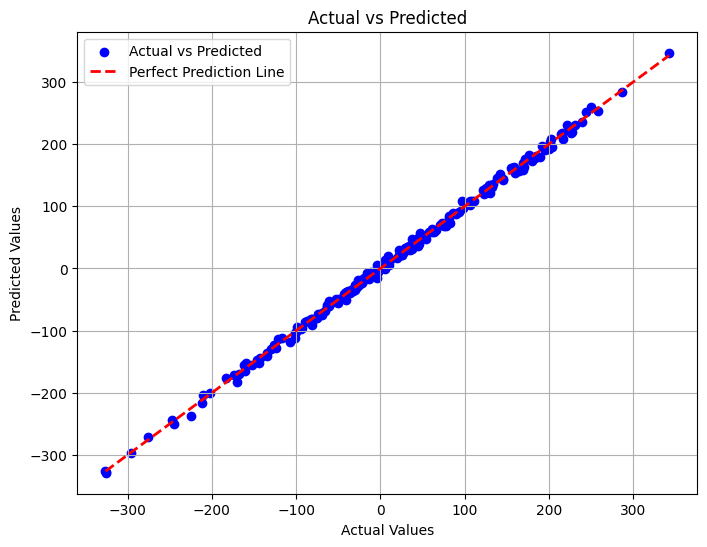

In [49]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

**Actual vs Predicted Plot Intepretation**
Ideally, most points are clustered closely around the perfect prediction line. This indicates that the model's predictions are accurate and closely match the actual values

**create a residual plot to visualize the residuals**

This plot displays the differences between the actual and predicted values from your model predictions,  Residual plots are useful for understanding the distribution and patterns of errors made by your model.

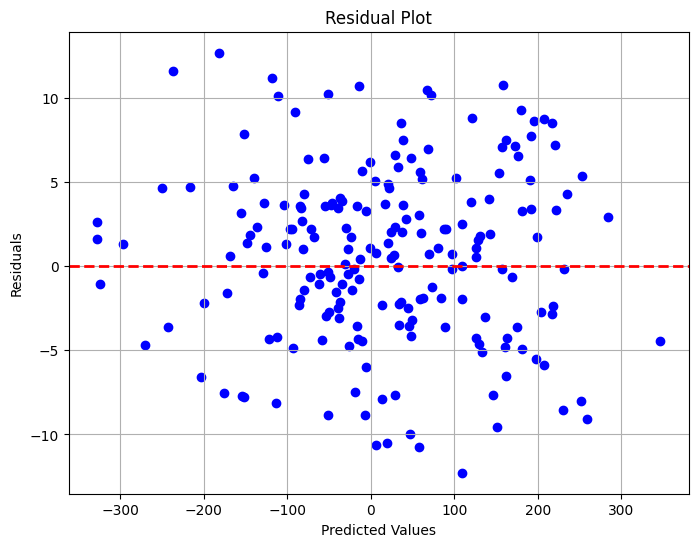

In [50]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

**Residual Plot Interpretation**
Residuals are randomly scattered around the horizontal line at y=0.

This indicates that the model's predictions are unbiased on average, and the errors are not systematically overestimating or underestimating the target variable

**Interpret the Coefficients and Y-Intercept**

Lasso regression provides the coefficients of the features and the intercept. These values help us understand the relationship between each feature and the target variable. However, due to the L1 regularization, some coefficients may be zero, indicating that the feature is not used in the model.

In [51]:
print(type(X_test))

<class 'numpy.ndarray'>


In [52]:
print(X_train_scaled.shape)

print(X_train_scaled)
print(type(X_train))

(800, 10)
[[-0.98511582 -0.5563893   0.26992686 ... -2.15824659 -0.44073813
   0.42555621]
 [ 1.00696815 -1.75007672 -0.82739846 ... -0.56629889  0.73593405
  -1.08184506]
 [ 0.20525096 -0.47742306  0.17401435 ... -1.30030872 -1.5682232
  -0.0789832 ]
 ...
 [ 2.54354132 -1.23964784  0.63127171 ... -0.00297456  0.74310755
   0.41735776]
 [ 0.05123623 -0.3812884   0.26001057 ... -0.96067431 -1.12897299
  -0.63977769]
 [-0.29950477  1.41185077  0.9941316  ...  0.20658279 -1.39292865
   1.08169707]]
<class 'numpy.ndarray'>


In [53]:

# Convert X_train to a Pandas DataFrame with original column names
features =  ['region','year','manufacturer','model','fuel','odometer','title_status','transmission' ,'state',' age']

X_train = pd.DataFrame(X_train, columns=features)

# Get coefficients and intercept

coefficients = pd.Series(best_lasso_model.coef_, index=X_train.columns)
intercept = best_lasso_model.intercept_

# Print coefficients and intercept
print("Lasso Regression Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)

Lasso Regression Coefficients:
region          34.308565
year            32.298957
manufacturer    29.723986
model           77.860309
fuel             7.195754
odometer        10.426611
title_status    71.873079
transmission     9.316824
state            5.413494
 age            59.602569
dtype: float64

Intercept: -0.3261688555097076


Each point on the scatter plot represents a single observation from the test set. The position of each point shows the actual value (x-coordinate) and the predicted value (y-coordinate) for that observation.

The red line represents the line of perfect prediction, where the predicted values exactly match the actual values (y = x). Points on this line indicate perfect predictions by the model.

**Coefficients Interpretation:**

**Coefficient Value:** The value of each coefficient represents the expected change in the target variable for a one-unit change in the corresponding feature, assuming all other features remain constant.

**Intercept:** The intercept represents the expected value of the target variable when all features are zero.


**Each coefficient corresponds to a specific feature in the model:**

region: 34.308565

year: 32.298957

manufacturer: 29.723986

model: 77.860309

fuel: 7.195754

odometer: 10.426611

title_status: 71.873079

transmission: 9.316824

state: 5.413494

age: 59.602569


The coefficients represents the estimated change in the predicted used car price (in dollars) for a one-unit increase in each respective feature, holding all other features constant.

Larger coefficients suggest a stronger impact on the predicted price.

**For Example:**

If all other variables are held constant, each unit increase in the model (car model) is associated with an increase of approximately
77.86 dollars in the predicted price of the used car.
Similarly, each unit increase in title_status (title status) is associated with an increase of about 71.87 dollars in the predicted price.

**Conclusion:**

Goal of this analysis is to understand what factors make a car more or less expensive, and  provide clear recommendations to the client -- a used car dealership -- as to what consumers value in a used car.


Model of the car and Status of the Title has a significant positive effect on the used car price.

Age of the vehicle has significant impact on the car price, consumer values in more on a relatively new car.

Region and Manufacturer of the car has relatively median impact on the car price.

Features like State, fuel type, transmission type odometer reading has relatively low impact on a used car price when compare to other features

It clearly showing that the Consumer  considers the model of the car, clean tile and relatively new cars while valueing a used car

**Evaluation**

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this. We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices. Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.